Download London Crime Dataset melalui kaggle [Disini](https://www.kaggle.com/jboysen/london-crime )

- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that perticular month
- year: the year of the summary statistic
- month: the month of the summary statistic


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Melakukan import data
df = pd.read_csv('../Data/london_crime_by_lsoa.csv')
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
# Melihat dimensi dari data
df.shape

(13490604, 7)

In [4]:
# Melihat type data dari setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
lsoa_code         object
borough           object
major_category    object
minor_category    object
value             int64
year              int64
month             int64
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
# mengecek missing value pada variabel
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

### Sebutkan wilayah yang memiliki jumlah kejahatan tertinggi dan terendah selama 2008 - 2016?

In [6]:
df_new = df.groupby('borough')[['value']].sum()
df_new = df_new.sort_values(by = 'value', ascending = False)

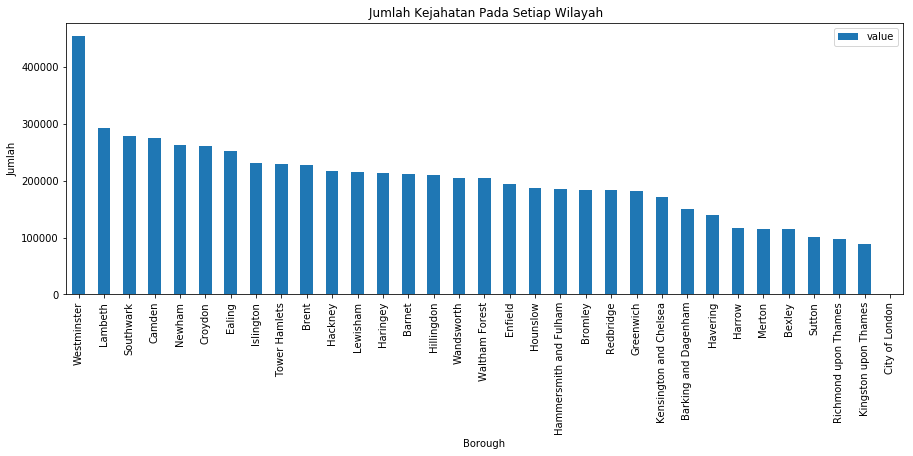

In [7]:
df_new.plot(kind= 'bar',figsize = (15,5))
plt.title(' Jumlah Kejahatan Pada Setiap Wilayah')
plt.xlabel('Borough')
plt.ylabel('Jumlah')
plt.show()

**INSIGHT :** 

Diperoleh bahwa wilayah yang memiliki jumlah kejahatan tertinggi yaitu Westminster sedangkan wilayah yang memiliki jumlah kejahatan terendah yaitu City of Londin

### Perbandingan kejahatan di wilayah Westminster yang termasuk dalam major category

In [8]:
df_westminster = df[(df.borough == 'Westminster')]
df_west_maj = df_westminster.groupby('major_category', axis=0).sum()

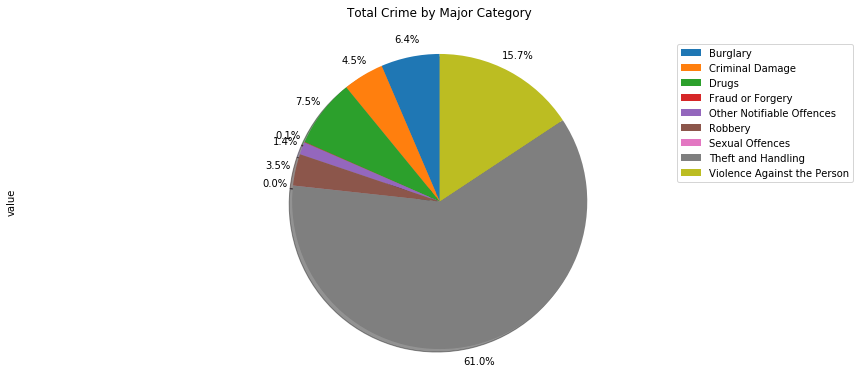

In [9]:
df_west_maj['value'].plot(kind='pie',
                      figsize=(15, 6),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None,        
                      pctdistance=1.12)

plt.title('Total Crime by Major Category', y = 1.05)

plt.axis('equal')

# add legend
plt.legend(labels=df_west_maj.index, loc='best')

plt.show()

**Insight :**

Kejahatan major category yang paling sering terjadi di wilayah Westminster yaitu Theft and Handling sebesar 61%

### Perbandingan Jumlah Kejahatan antara Westminer dan Lambeth 

In [10]:
df_area = df.loc[df['borough'].isin(['Westminster', 'Lambeth'])]
df_area.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
11,E01003076,Lambeth,Violence Against the Person,Other violence,0,2015,4
21,E01004660,Westminster,Theft and Handling,Handling Stolen Goods,0,2012,2
38,E01003067,Lambeth,Theft and Handling,Handling Stolen Goods,0,2010,8
46,E01004678,Westminster,Criminal Damage,Other Criminal Damage,0,2008,11
47,E01003064,Lambeth,Theft and Handling,Theft From Shops,0,2013,7


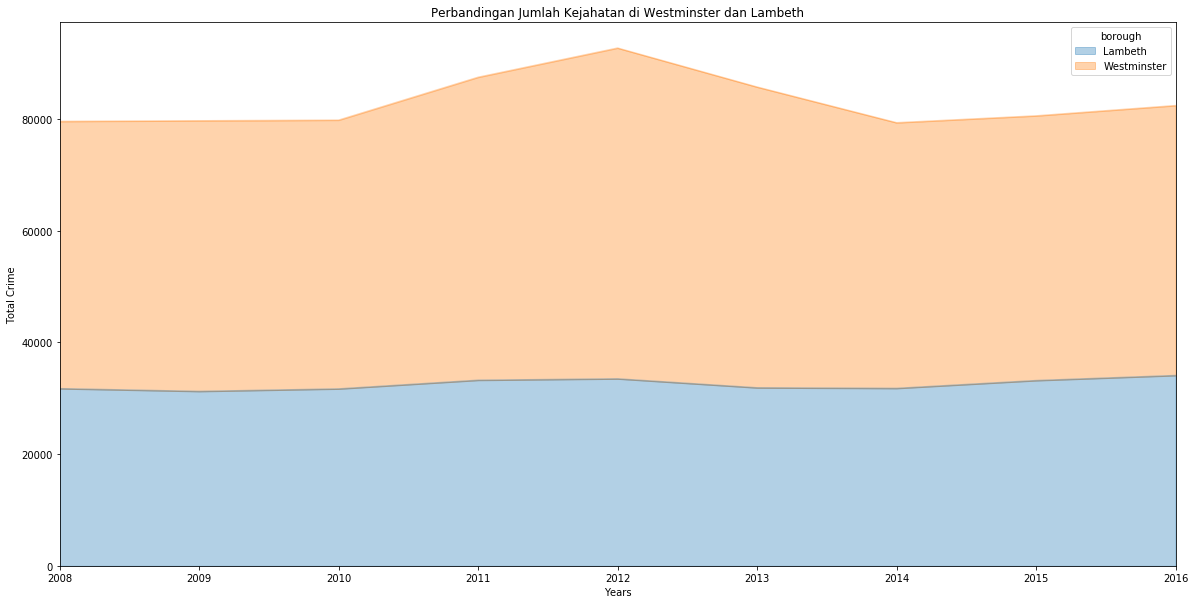

In [11]:
df_area.groupby(['borough', 'year'])['value'].sum().reset_index().pivot(index = 'year', columns='borough', values='value').plot(kind = 'area', alpha = 0.34, stacked = True, figsize = (20,10))


plt.title('Perbandingan Jumlah Kejahatan di Westminster dan Lambeth') 
plt.ylabel('Total Crime') 
plt.xlabel('Years')

plt.show()

**Insight :**

Dari tahun 2008 hingga 2016, jumlah kejahatan Lambeth selalu stabil disekitar 30000 sedangkan di wilayah westminster pernah terjadi lonjakan pada tahun 2012

### Wilayah mana yang mempunyai rata-rata jumlah kejahatan tertinggi dan terendah antara wilayah Ealing, Greenwich dan Lewisham?

In [12]:
df_box = df.loc[df['borough'].isin(['Lewisham', 'Greenwich','Ealing'])]
df_box.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
27,E01001201,Ealing,Violence Against the Person,Other violence,0,2012,11


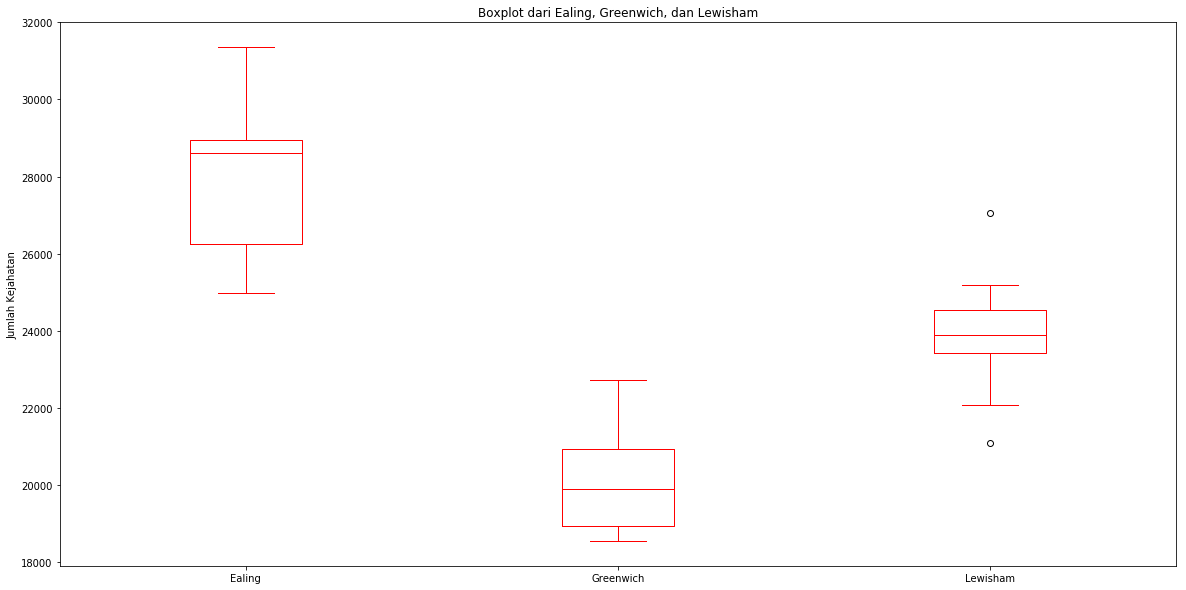

In [13]:
df_box.groupby(['borough', 'year'])['value'].sum().reset_index().pivot(index = 'year', columns='borough', values='value').plot(kind = 'box', figsize = (20,10), color = 'red')


plt.title('Boxplot dari Ealing, Greenwich, dan Lewisham')
plt.ylabel('Jumlah Kejahatan')

plt.show()

**Insight :**

Dari grafik boxplot diketahui bahwa wilayah Ealing mempunyai rata-rata jumlah kriminalitas paling tinggi dibandingkan wilayah Greenwich dan Lewisham, sedangkan yang jumlah kriminalitas terendah ada di wilayah Greenwich

### Bagaimana persebaran jumlah kejahatan di London setiap tahunnya?

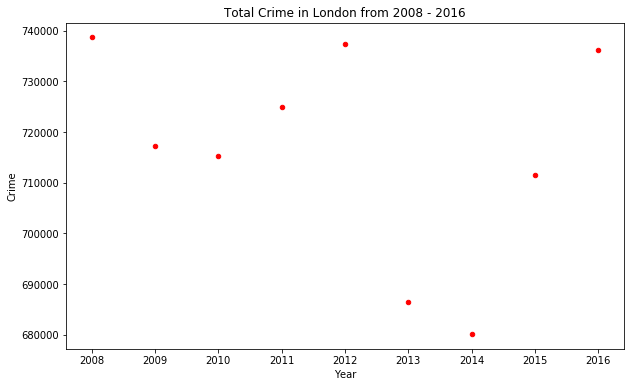

In [14]:
df_total = df.groupby(['borough', 'year'])['value'].sum().reset_index().pivot(index = 'year', columns='borough', values='value')
df_total["total"] = df_total[list(df_total)].sum(axis=1)
df_total.reset_index(inplace = True)

# Graded-Funtion Begin (~1 Lines)
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='red')
# Graded-Funtion End

plt.title('Total Crime in London from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Crime')

plt.show()

### Bagaimana distribusi jumlah kriminal di Croydon dan Bexley selama tahun 2008 - 20016?

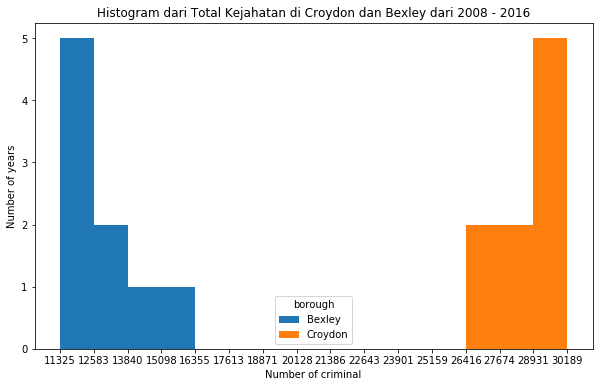

In [15]:
df_hist = df.loc[df['borough'].isin(['Croydon', 'Bexley'])].groupby(['borough', 'year'])['value'].sum().reset_index().pivot(index = 'year', columns='borough', values='value')
df_hist.plot(kind = 'hist', figsize = (10, 6), bins = 15, xticks = np.histogram(df_hist, 15)[1])


plt.title('Histogram dari Total Kejahatan di Croydon dan Bexley dari 2008 - 2016') 
plt.ylabel('Number of years') 
plt.xlabel('Number of criminal')

plt.show()

In [16]:
from wordcloud import WordCloud, ImageColorGenerator

In [17]:
#Membuat sebuah test dengan melakukan perulangan pada kolom borough.
new_text = " ".join(str(i) for i in (df.minor_category))
wc = WordCloud(max_words=1000, background_color='white').generate(new_text)

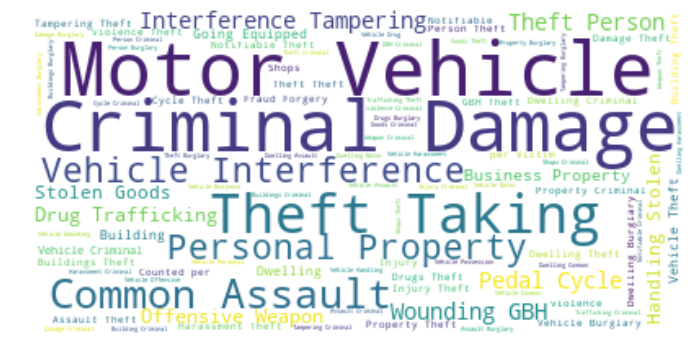

In [18]:
#membuat visualisasi wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

**Insight :**

Dari 1000 kejahatan dalam kategori minor, Criminal damage yang paling sering terjadi di London

In [19]:
!pip install folium 
import folium

In [20]:
world_map = folium.Map()
world_map

In [21]:
# Graded-Funtion Begin (~1 Lines)
world_map = folium.Map(location = [51.507400, -0.127800], zoom_start = 8)
# Graded-Funtion End

# display world map
world_map